## Problem 5.1

In [11]:
%matplotlib inline
from __future__ import division
pylab.rcParams['figure.figsize'] = (16, 10)
import scipy.io as sio
import numpy as np
import math
import matplotlib.pyplot as plt
data = sio.loadmat('../data/programming/hw1progde.mat')
test_data = data['x_te']
training_data = data['x_tr']
h = 0.01

## 10 different measures, whcih one isbest? training or validation

In [9]:
def K(x, XI, h, kernel_type='gaussian'):
    """
    Parameters
    ----------
    x: Point location
    XI: Vector of training data
    """
    if kernel_type == 'gaussian':
        s=0
        l=0
        for xi in XI:
            u = (x-xi)/h
            l+=1
            e = (1/math.sqrt(2*math.pi))*math.exp(-u*u/2)
            s+=e
        return s/(l*h)
    elif kernel_type == 'epanechnikov':
        s=0
        l=0
        for xi in XI:
            u = (x-xi)/h
            l+=1
            if abs(u)<=1:
                s+=(3/4)*(1-u*u)
        return s/(l*h)
    elif kernel_type == 'histogram':
        s=0
        l=0
        for xi in XI:
            u = (x-xi)/h
            l+=1
            if abs(u)<=1:
                s+=0.5
        return s/(l*h)

def inrange(x,Y):
    if x<Y[1] and X>=Y[0]:
        return True 
    return False

def histogram(x, bandwidth=1):
    min_x = np.min(x)
    max_x = np.max(x)
    range_x = max_x-min_x
    bins = math.ceil(range_x/bandwidth)
    list_of_bins = []
    for i in range(bins):
        list_of_bins.append([min_x+bandwidth*i, min_x+bandwidth*(i+1)])
    counts = np.zeros(bins)
    for xi in x:
        for lindex, lb in enumerate(list_of_bins):
            if inrange(xi, lb):
                counts[lindex]+=1
    return counts   

## Gaussian
$$
K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}} \forall u \in \mathbb{R}
$$
![alt](https://upload.wikimedia.org/math/5/a/f/5af3209d1e047b522531be782f23185c.png)

In [21]:
H = [0.01,0.07,0.05,0.1,0.5, 0.7]
output_gaussian = []
x_points = np.linspace(0.1,1)

for h in H:
    gaussian_r = [K(x,training_data, h, 'gaussian') for x in x_points]
    output_gaussian.append(gaussian_r)



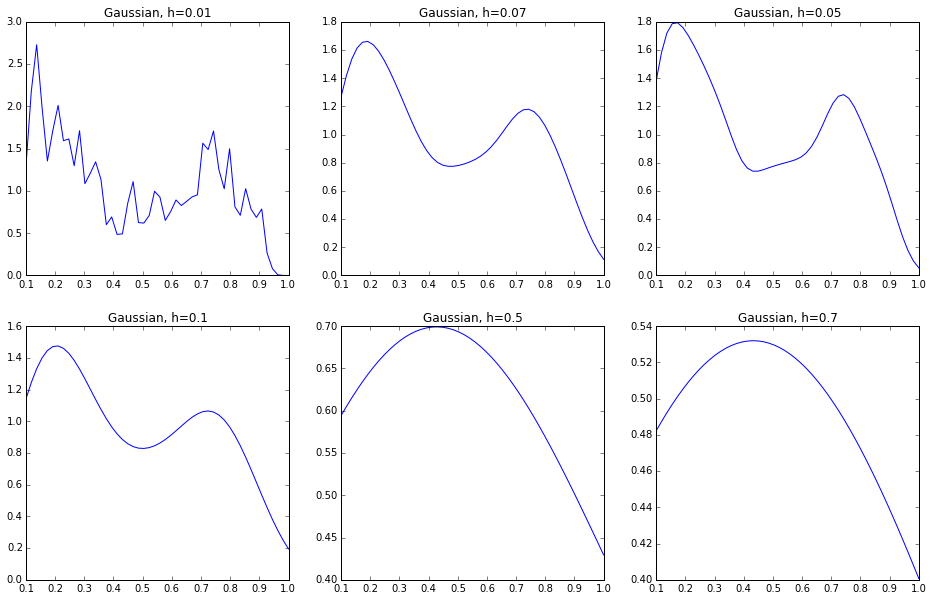

In [24]:
f, axarr = plt.subplots(2, 3)
for i, gaussian_r in enumerate(output_gaussian):
    if i<3:
        axarr[0, i].plot(np.sort(x_points), gaussian_r)
        axarr[0, i].set_title('Gaussian, h={}'.format(H[i]))
    else:
        axarr[1, i-3].plot(np.sort(x_points), gaussian_r)
        axarr[1, i-3].set_title('Gaussian, h={}'.format(H[i]))
f.show()

In [27]:
ev_r = []
for h in H:
    r = [K(x,training_data, h, 'epanechnikov') for x in x_points]
    ev_r.append(r)


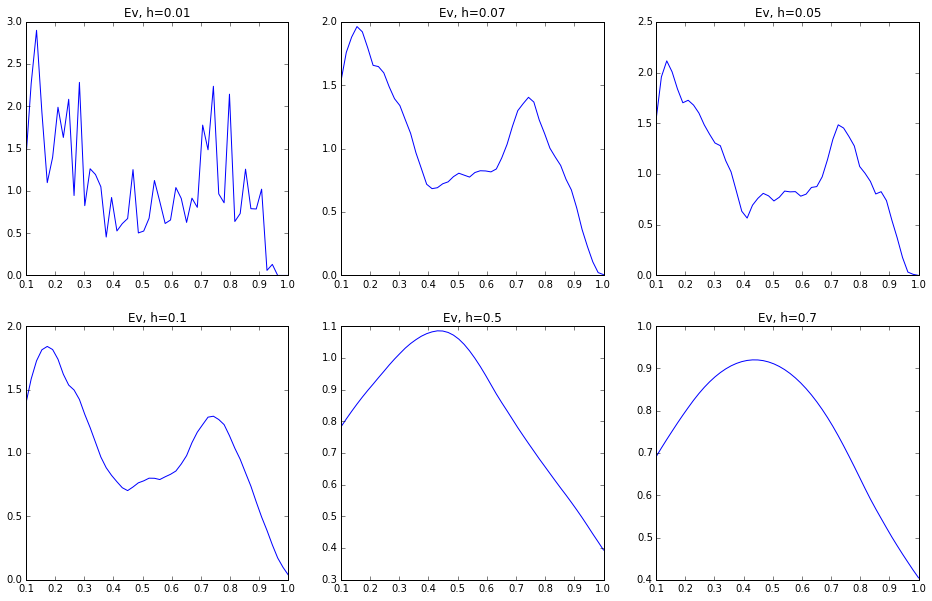

In [28]:
f, axarr = plt.subplots(2, 3)
for i, gaussian_r in enumerate(ev_r):
    if i<3:
        axarr[0, i].plot(np.sort(x_points), gaussian_r)
        axarr[0, i].set_title('Ev, h={}'.format(H[i]))
    else:
        axarr[1, i-3].plot(np.sort(x_points), gaussian_r)
        axarr[1, i-3].set_title('Ev, h={}'.format(H[i]))
f.show()

In [30]:
hi_r = []
for h in H:
    r = [K(x,training_data, h, 'histogram') for x in x_points]
    hi_r.append(r)


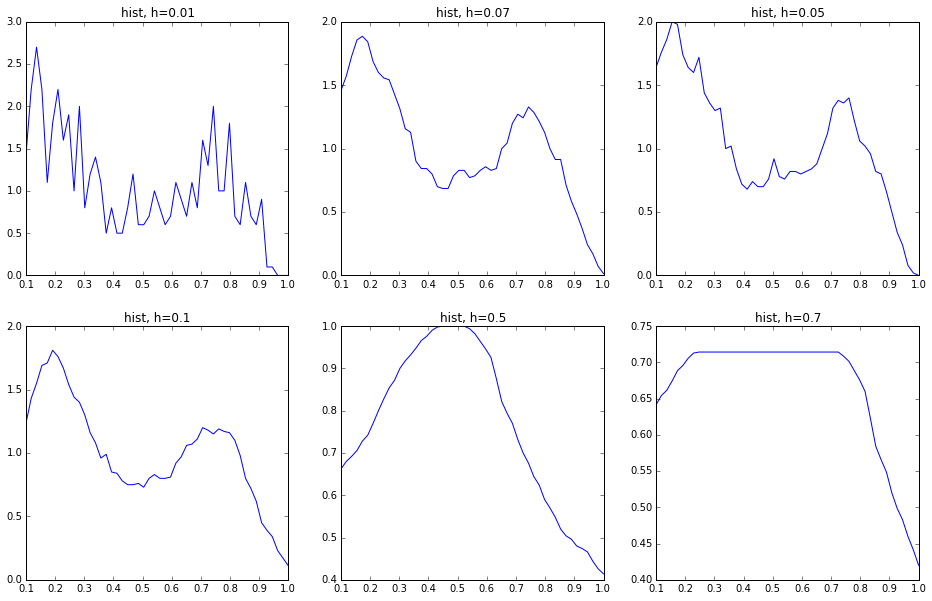

In [31]:
f, axarr = plt.subplots(2, 3)
for i, gaussian_r in enumerate(hi_r):
    if i<3:
        axarr[0, i].plot(np.sort(x_points), gaussian_r)
        axarr[0, i].set_title('hist, h={}'.format(H[i]))
    else:
        axarr[1, i-3].plot(np.sort(x_points), gaussian_r)
        axarr[1, i-3].set_title('hist, h={}'.format(H[i]))
f.show()

In [41]:
## Optimum bandwidth calculation
sigma_tr = np.std(training_data)
sigma_te = np.std(test_data)

h = 0.94*sigma_tr*len(training_data)**(-0.2)

print(sigma_tr)
print(sigma_te)
print(h)


0.262856444965
0.258378205441
0.0712939180627


(array([ 0.1735486 ,  0.04338715,  0.1735486 ,  0.13016145,  0.0867743 ,
         0.13016145,  0.34709719,  0.21693575,  0.47725864,  0.30371004,
         0.39048434,  0.56403294,  0.43387149,  0.65080724,  0.65080724,
         0.47725864,  0.56403294,  0.56403294,  0.69419439,  0.82435583,
         0.73758154,  1.12806588,  0.99790443,  0.91113013,  0.86774298,
         0.91113013,  0.99790443,  1.12806588,  1.30161448,  0.99790443,
         0.95451728,  1.38838877,  1.12806588,  1.21484018,  1.60532452,
         1.43177592,  1.21484018,  1.12806588,  1.25822733,  1.56193737,
         1.43177592,  1.64871167,  1.51855022,  1.47516307,  1.69209882,
         2.12597031,  1.34500162,  2.21274461,  1.64871167,  1.64871167,
         2.03919601,  1.77887312,  1.60532452,  1.77887312,  1.73548597,
         1.69209882,  2.08258316,  1.73548597,  1.51855022,  1.56193737,
         1.69209882,  1.47516307,  1.73548597,  2.08258316,  1.99580886,
         1.90903456,  1.82226027,  1.77887312,  1.9

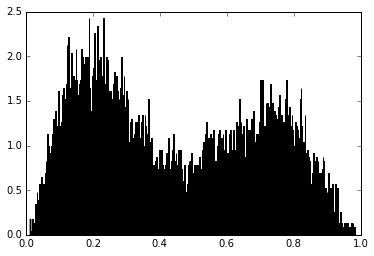

In [37]:
plt.hist(test_data, bins=400, fc='#AAAAFF', normed=True)


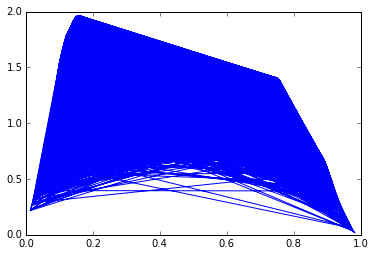

In [43]:
ea_r = [K(x[0],training_data, 0.07, 'epanechnikov') for x in test_data]

plt.plot(test_data,ea_r)

In [33]:
hist_r = [K(x[0],training_data, 0.5, 'histogram') for x in test_data]
#hist_r = histogram(training_data)
#print(hist_r)

## Epanechnikov kernel

$$
K(u) = \begin{cases}
\frac{3}{4}[1-u^2] & |u| \in [0,1],\\
0 & otherwise
\end{cases}
$$

## Histogram
$$
K(u) = \begin{cases}
\frac{1}{2}  & |u| \leq 1\\
0 & otherwise \\
\end{cases}
$$

9500


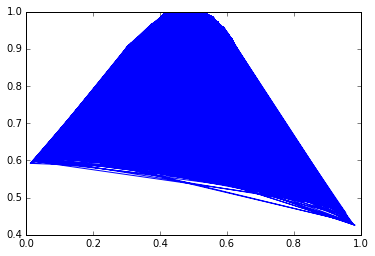

In [44]:
plt.plot(test_data, hist_r)
print len(test_data)

In [56]:
## Randomly partion test_Data into 19 subsets
import random
N_split = 19
test_data_shuffled = test_data.copy()
random.shuffle(test_data_shuffled)
list_size = int(len(test_data_shuffled)/N_split)
print(list_size)

list_of_shuffled_te = [test_data_shuffled[0+list_size*i : list_size*(i+1)] for i in xrange(N_split)]

x_points = np.linspace(0.1,1)
print(len(x_points))

f_scores=[]
for index, lte in enumerate(list_of_shuffled_te):
    f_scores.append([])
    for x in x_points:
        de = K(x, lte, 0.07, 'gaussian')
        f_scores[index].append(de)
        
f_hn = np.array([np.sum(a) for a in f_scores])
f_h = np.mean(f_hn)
q = np.sum((f_hn-f_h)**2)
E=q/N_split
print E

500
50
0.139370187008
